# 1 Beyond Blue EDA (unflattened)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import emoji
import json
from collections import Counter

# Load CSV
df = pd.read_csv("data/beyondblue_data.csv")

## 1.1 Basic view

In [8]:
# Basic info
df.head()

,post_id,title,author,date,category,preview,post_text,num_comments,comments_combined,url
0,1,Struggling at the moment,Toby,2025-07-16,Anxiety,"Hello everyone, this is my first post, so I ho...","Hello everyone, this is my first post, so I ho...",4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/st...
1,2,Anxiety,Shell1,2025-05-23,Anxiety,Hi my name is Michelle and I have had Anxiety ...,Hi my name is Michelle and I have had Anxiety ...,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/an...
2,3,overwhelmed,Guest_87295139,2025-07-14,Anxiety,sorry if this is alot i just rlly need to get ...,sorry if this is alot i just rlly need to get ...,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ov...
3,4,Stalker,G-i-g-i,2025-07-14,Anxiety,I feel no one is supporting me. I have a stalk...,I feel no one is supporting me. I have a stalk...,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/st...
4,5,Generalised Anxiety disorder not going good,Lil123,2025-07-14,Anxiety,"Hi, my name is lily. I have no idea what else ...","Hi, my name is lily. I have no idea what else ...",2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ge...


In [9]:
print(df.dtypes)

post_id               int64
title                object
author               object
date                 object
category             object
preview              object
post_text            object
num_comments          int64
comments_combined    object
url                  object
dtype: object


In [10]:
print(df.shape)

(6753, 10)


In [11]:
# Check for missing values
na_counts = df.isna().sum().sort_values(ascending=False)
print("=== Missing Values per Column ===")
print(na_counts.to_frame("missing_count"))
print("\nAny missing values? ->", na_counts.sum() > 0)

=== Missing Values per Column ===
                   missing_count
post_id                        0
title                          0
author                         0
date                           0
category                       0
preview                        0
post_text                      0
num_comments                   0
comments_combined              0
url                            0

Any missing values? -> False


In [12]:
# Check for duplicate rows
dup_rows = df.duplicated().sum()
print("\n=== Duplicate Rows ===")
print("Number of completely duplicated rows:", dup_rows)


=== Duplicate Rows ===
Number of completely duplicated rows: 0


# 1.2 Cleaning

### Fixing datetime

In [13]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check the range of dates
print("Earliest post date:", df['date'].min())
print("Latest post date:", df['date'].max())

# Number of posts per year
print("\nPosts per year:")
print(df['date'].dt.year.value_counts().sort_index())

# Number of posts per month (across years)
print("\nPosts per month (YYYY-MM):")
print(df['date'].dt.to_period('M').value_counts().sort_index())

Earliest post date: 2019-01-06 00:00:00
Latest post date: 2025-07-18 00:00:00

Posts per year:
date
2019     421
2020     665
2021    1438
2022    1378
2023    1374
2024    1038
2025     439
Name: count, dtype: int64

Posts per month (YYYY-MM):
date
2019-01    19
2019-02    22
2019-03    44
2019-04    22
2019-05    36
           ..
2025-03    89
2025-04    62
2025-05    56
2025-06    50
2025-07    27
Freq: M, Name: count, Length: 79, dtype: int64


In [14]:
df.head()

,post_id,title,author,date,category,preview,post_text,num_comments,comments_combined,url
0,1,Struggling at the moment,Toby,2025-07-16,Anxiety,"Hello everyone, this is my first post, so I ho...","Hello everyone, this is my first post, so I ho...",4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/st...
1,2,Anxiety,Shell1,2025-05-23,Anxiety,Hi my name is Michelle and I have had Anxiety ...,Hi my name is Michelle and I have had Anxiety ...,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/an...
2,3,overwhelmed,Guest_87295139,2025-07-14,Anxiety,sorry if this is alot i just rlly need to get ...,sorry if this is alot i just rlly need to get ...,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ov...
3,4,Stalker,G-i-g-i,2025-07-14,Anxiety,I feel no one is supporting me. I have a stalk...,I feel no one is supporting me. I have a stalk...,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/st...
4,5,Generalised Anxiety disorder not going good,Lil123,2025-07-14,Anxiety,"Hi, my name is lily. I have no idea what else ...","Hi, my name is lily. I have no idea what else ...",2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ge...


### I think post_id, title, preview, url is unnecessary, so i will get rid of them.

In [15]:
# Drop unnecessary columns
df = df.drop(columns=['title', 'preview', 'url'])

# Check remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['post_id', 'author', 'date', 'category', 'post_text', 'num_comments', 'comments_combined']


In [16]:
df.head()

,post_id,author,date,category,post_text,num_comments,comments_combined
0,1,Toby,2025-07-16,Anxiety,"Hello everyone, this is my first post, so I ho...",4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times..."
1,2,Shell1,2025-05-23,Anxiety,Hi my name is Michelle and I have had Anxiety ...,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times..."
2,3,Guest_87295139,2025-07-14,Anxiety,sorry if this is alot i just rlly need to get ...,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
3,4,G-i-g-i,2025-07-14,Anxiety,I feel no one is supporting me. I have a stalk...,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
4,5,Lil123,2025-07-14,Anxiety,"Hi, my name is lily. I have no idea what else ...",2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."


In [17]:
# Bring post_id column to front
df = df[['post_id'] + [col for col in df.columns if col != 'post_id']]
df.head()

# Bring date column to second position
df = df[['post_id', 'date'] + [col for col in df.columns if col not in ['post_id', 'date']]]
df.head()

# Bring author in third position
df = df[['post_id', 'date', 'author'] + [col for col in df.columns if col not in ['post_id', 'date', 'author']]]
df.head()

# Bring post_text column in fourth position
df = df[['post_id', 'date', 'author', 'post_text'] + [col for col in df.columns if col not in ['post_id', 'date', 'author', 'post_text']]]
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times..."
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times..."
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."


In [18]:
# Find emoticons in post_text using emoji.is_emoji
df['emoticons'] = df['post_text'].apply(lambda x: [char for char in x if emoji.is_emoji(char)])
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined,emoticons
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",[]
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",[]
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]


In [19]:
# How many posts contain emojis?
posts_with_emojis = df[df['emoticons'].str.len() > 0]
posts_with_emojis_count = posts_with_emojis.shape[0]
posts_with_emojis_count

467

In [20]:
# Display all the distinct emoticons used
distinct_emoticons = df['emoticons'].explode().unique()
distinct_emoticons

array([nan, '😦', '😢', '❤', '😕', '🙂', '😞', '😭', '🕴', '😇', '🤦', '🏻', '♀',
       '🌙', '✋', '😌', '🚬', '🙏', '🏼', '🩷', '💕', '♥', '😫', '☹', '©', '🫶',
       '😪', '😩', '😄', '😊', '👋', '☺', '💖', '🙄', '🤷', '😔', '😓', '😅', '😎',
       '💭', '😵', '🌿', '🛁', '✍', '👣', '🤓', '🤠', '😀', '💚', '😶', '😣', '✌',
       '🥲', '💓', '🤔', '🌻', '💜', '🤗', '💗', '😂', '💙', '🤯', '💪', '🥺', '🧐',
       '😬', '😠', '🤞', '😆', '✊', '🧡', '🍅', '💛', '🧚', '🙋', '💝', '✨', '😉',
       '😥', '☁', '🖤', '😑', '😏', '😝', '🚨', '💡', '😃', '💔', '🏾', '😡', '🤣',
       '👍', '🌱', '👉', '👈', '😿', '🌴', '🦋', '🫣', '🙊', '🥰', '💞', '😛', '🐕',
       '🦺', '🎂', '🌞', '🐻', '😮', '👐', '🌸', '😨', '🐄', '😯', '🌷', '❣', '🕊',
       '⚠', '🙇', '⛔', '♂', '😐'], dtype=object)

In [21]:
# Remove the emojis
df['post_text'] = df['post_text'].apply(lambda x: ''.join([char for char in x if not emoji.is_emoji(char)]))
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined,emoticons
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",[]
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",[]
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]


In [22]:
# Check if any emojis left
df['post_text'].apply(lambda x: any(emoji.is_emoji(char) for char in x))

# False count and True count
df['post_text'].apply(lambda x: any(emoji.is_emoji(char) for char in x)).value_counts()

post_text
False    6753
Name: count, dtype: int64

In [23]:
# Remove emoticons column
df = df.drop(columns=['emoticons'])
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times..."
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times..."
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."


In [ ]:
# Save the dataset as a CSV file
df.to_csv('data/beyondblue_data_unflattened.csv', index=False)

## 1.3 EDA

category
Depression                         1968
Anxiety                            1951
Suicidal thoughts and self-harm    1445
PTSD and trauma                    1389
Name: count, dtype: int64


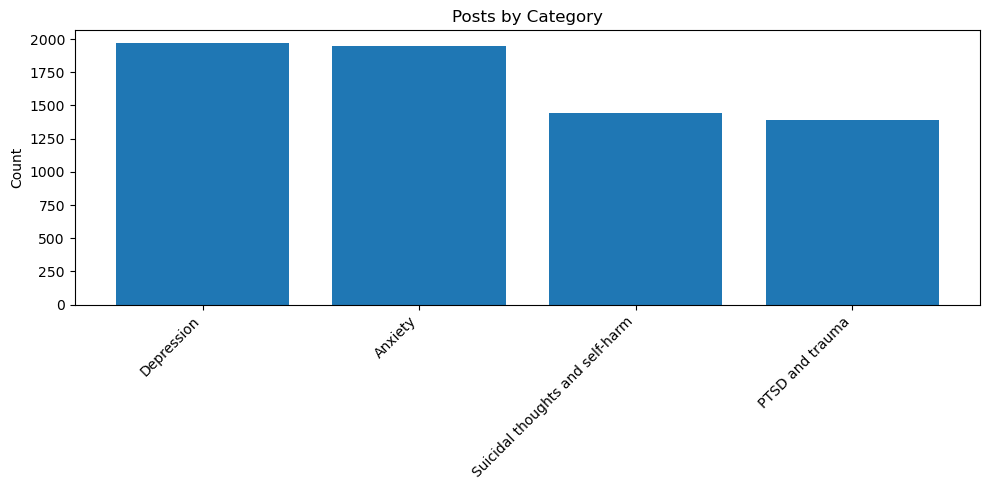

In [25]:
# which categories are most active? (bar chart + table)
cat_counts = df['category'].value_counts()

print(cat_counts)

plt.figure(figsize=(10,5))
plt.bar(cat_counts.index, cat_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Posts by Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [26]:
# the ratio of post per category
post_per_cat = df['category'].value_counts() / df['category'].count()
print(post_per_cat)

category
Depression                         0.291426
Anxiety                            0.288909
Suicidal thoughts and self-harm    0.213979
PTSD and trauma                    0.205686
Name: count, dtype: float64


In [27]:
# posts per year and per month (tables)
posts_per_year = df['date'].dt.year.value_counts().sort_index()
posts_per_month = df['date'].dt.to_period('M').value_counts().sort_index()

print("Posts per year:\n", posts_per_year, "\n")
print("Posts per month (YYYY-MM):\n", posts_per_month)

Posts per year:
 date
2019     421
2020     665
2021    1438
2022    1378
2023    1374
2024    1038
2025     439
Name: count, dtype: int64 

Posts per month (YYYY-MM):
 date
2019-01    19
2019-02    22
2019-03    44
2019-04    22
2019-05    36
           ..
2025-03    89
2025-04    62
2025-05    56
2025-06    50
2025-07    27
Freq: M, Name: count, Length: 79, dtype: int64


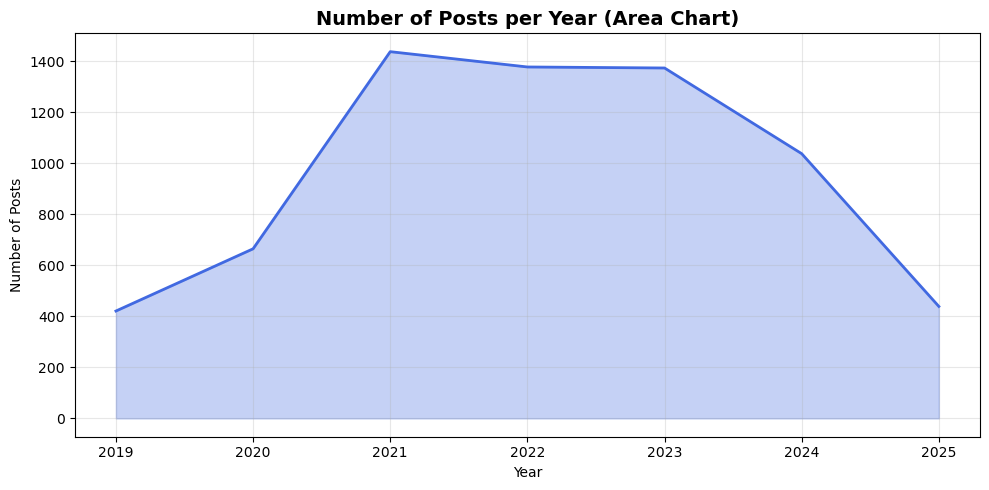

In [28]:
# posts per year
posts_per_year = df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=posts_per_year.index, y=posts_per_year.values, color="royalblue", linewidth=2)

# fill area
plt.fill_between(posts_per_year.index, posts_per_year.values, alpha=0.3, color="royalblue")

plt.title("Number of Posts per Year (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

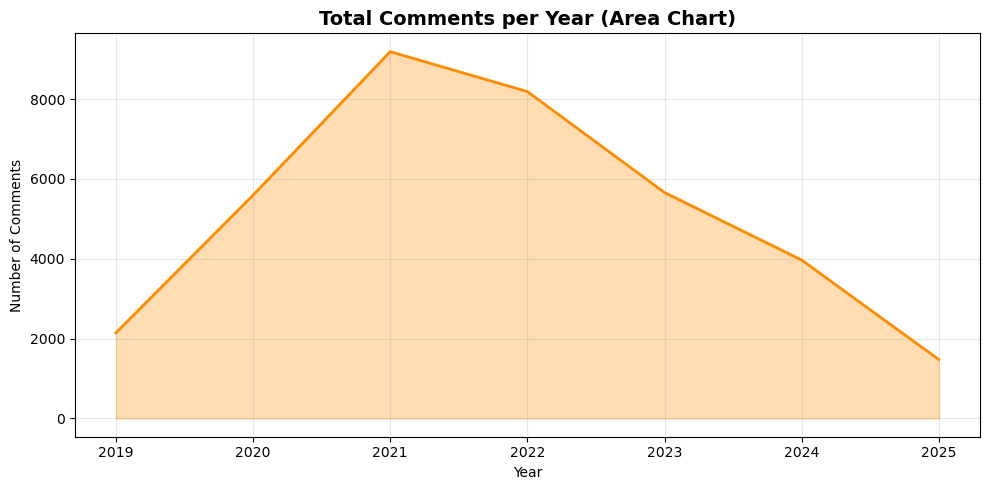

In [29]:
# comments per year
comments_per_year = df.groupby(df['date'].dt.year)['num_comments'].sum().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=comments_per_year.index, y=comments_per_year.values, color="darkorange", linewidth=2)

# fill area
plt.fill_between(comments_per_year.index, comments_per_year.values, alpha=0.3, color="darkorange")

plt.title("Total Comments per Year (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

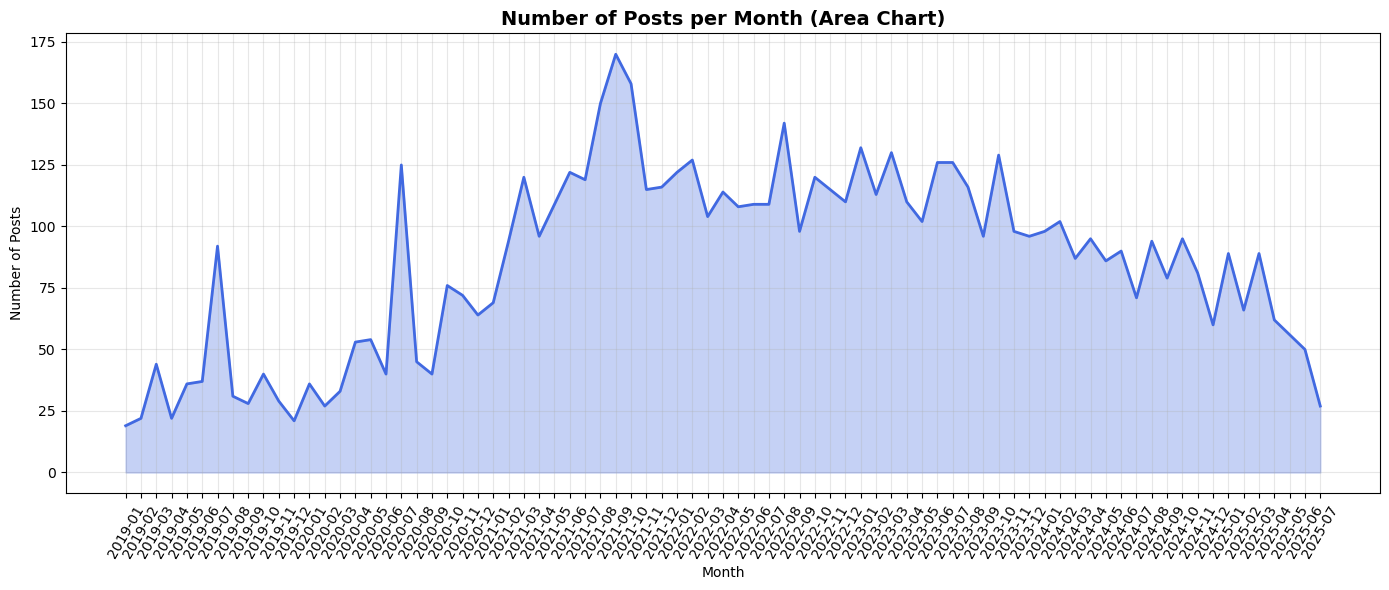

In [30]:
# posts per month
posts_per_month = df['date'].dt.to_period('M').value_counts().sort_index()
posts_per_month.index = posts_per_month.index.astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(x=posts_per_month.index, y=posts_per_month.values, color="royalblue", linewidth=2)

# fill area under curve
plt.fill_between(posts_per_month.index, posts_per_month.values, alpha=0.3, color="royalblue")

plt.title("Number of Posts per Month (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

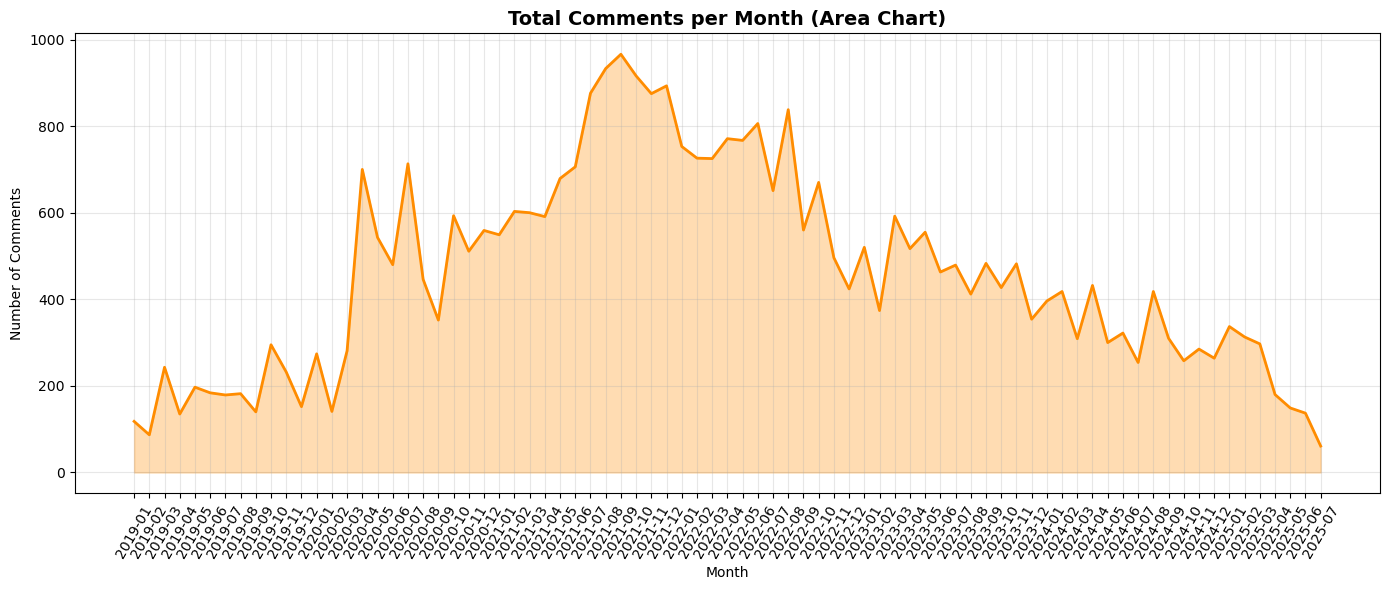

In [31]:
# comments per month
comments_per_month = df.groupby(df['date'].dt.to_period('M'))['num_comments'].sum().sort_index()
comments_per_month.index = comments_per_month.index.astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(x=comments_per_month.index, y=comments_per_month.values, color="darkorange", linewidth=2)

# fill area under curve
plt.fill_between(comments_per_month.index, comments_per_month.values, alpha=0.3, color="darkorange")

plt.title("Total Comments per Month (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# total comments per year and per month (tables)
comments_per_year = df.groupby(df['date'].dt.year)['num_comments'].sum().sort_index()
comments_per_month = df.groupby(df['date'].dt.to_period('M'))['num_comments'].sum().sort_index()

print("Total comments per year:\n", comments_per_year, "\n")
print("Total comments per month (YYYY-MM):\n", comments_per_month)

Total comments per year:
 date
2019    2144
2020    5593
2021    9187
2022    8187
2023    5658
2024    3966
2025    1474
Name: num_comments, dtype: int64 

Total comments per month (YYYY-MM):
 date
2019-01    118
2019-02     87
2019-03    243
2019-04    135
2019-05    197
          ... 
2025-03    297
2025-04    180
2025-05    149
2025-06    137
2025-07     61
Freq: M, Name: num_comments, Length: 79, dtype: int64


Average post length: 1190.2505553087517
Max post length: 4863


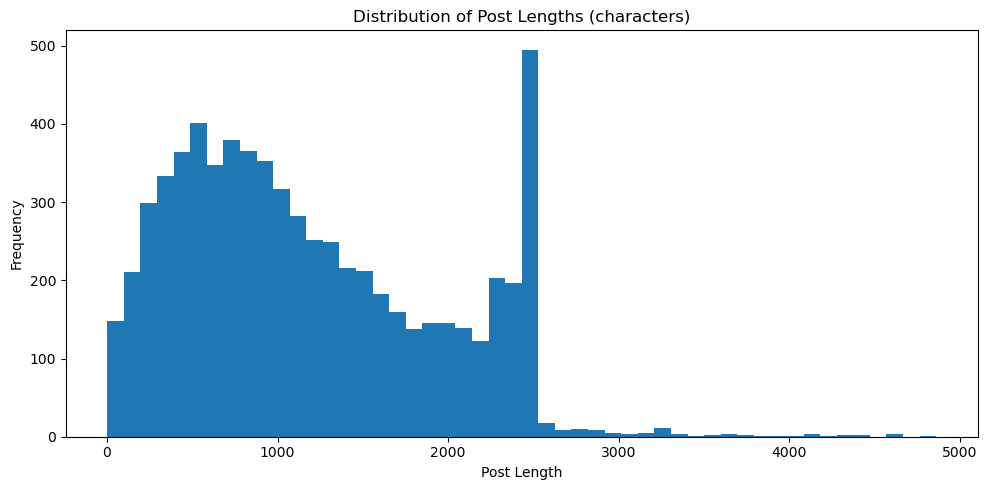

In [33]:
# average post length + distribution
df['post_length'] = df['post_text'].astype(str).str.len()

print("Average post length:", df['post_length'].mean())
print("Max post length:", df['post_length'].max())

plt.figure(figsize=(10,5))
plt.hist(df['post_length'], bins=50)
plt.title("Distribution of Post Lengths (characters)")
plt.xlabel("Post Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

count    6753.000000
mean        5.361913
std         6.867736
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        40.000000
Name: num_comments, dtype: float64


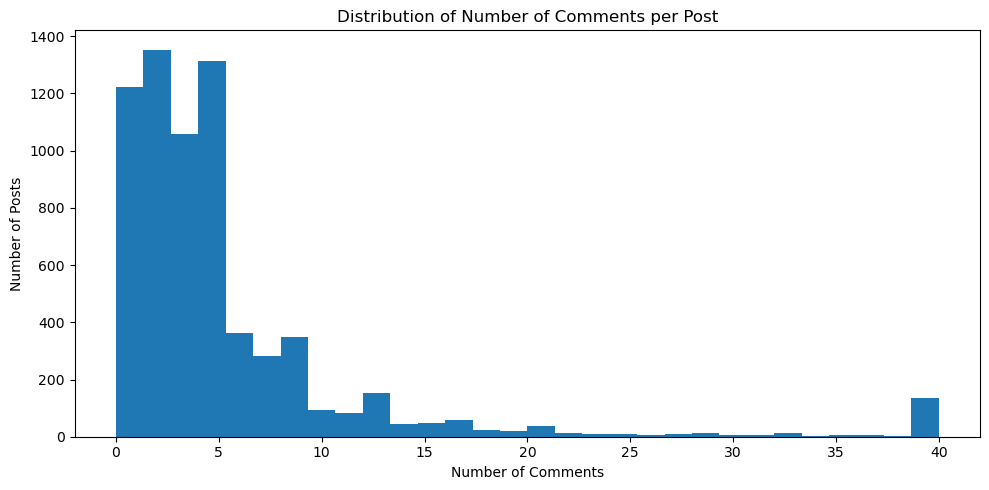

In [34]:
# distribution of num_comments + summary stats
print(df['num_comments'].describe())

plt.figure(figsize=(10,5))
plt.hist(df['num_comments'], bins=30)
plt.title("Distribution of Number of Comments per Post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

In [ ]:
# top 10 most commented posts
top_commented = (
    df.assign(preview=df['post_text'].astype(str).str.slice(0, 80))
      .sort_values('num_comments', ascending=False)
      .loc[:, ['post_id', 'num_comments', 'post_text']]
      .head(10)
)

top_commented

,post_id,num_comments,post_text
3406,3407,40,"I have nothing to live for, my psychiatrist pu..."
5858,5859,40,"Feeling nothing, im stepping out my comfort z..."
1363,1364,40,Hi I think have this Cherophobia and wonder if...
5973,5974,40,I find that the hardest time of all are the ev...
3176,3177,40,"Hi All, Each moment of every day, we have thou..."
95,96,40,"hey there, what physical symptoms of anxiety d..."
4346,4347,40,"Hi, I am getting past my last big attack of p..."
6428,6429,40,"For a while, I've been struggling with depress..."
2595,2596,40,"Hi all, I have been depressed from some years ..."
5988,5989,40,Hi lovely people I just wanted to start this t...


In [36]:
# top 10 most active users (by number of original posts)
top_authors = df['author'].value_counts().head(10)
print(top_authors)

author
Cookie64          69
Lost__            69
white knight      36
Elephant86        25
Eagle Ray         20
Rupes79           19
PsychedelicFur    19
Alel              19
Earth Girl        18
Beaser            17
Name: count, dtype: int64


In [ ]:
# top 10 most active commenters
comment_authors = Counter()

# loop through all rows and parse the comments_combined column
for row in df['comments_combined'].dropna():
    try:
        comments = json.loads(row.replace("'", '"'))
        for c in comments:
            comment_authors[c.get('author')] += 1
    except Exception as e:
        continue 

# get top 10 commenters
top_commenters = comment_authors.most_common(10)

print("Top 10 most active commenters:")
for user, count in top_commenters:
    print(f"{user}: {count} comments")

Top 10 most active commenters:
Sophie_M: 137 comments
Ggrand: 106 comments
Petal22: 76 comments
Eagle Ray: 65 comments
quirkywords: 47 comments
Summer Rose: 27 comments
jaz28: 23 comments
white knight: 19 comments
smallwolf: 19 comments
Scared: 18 comments


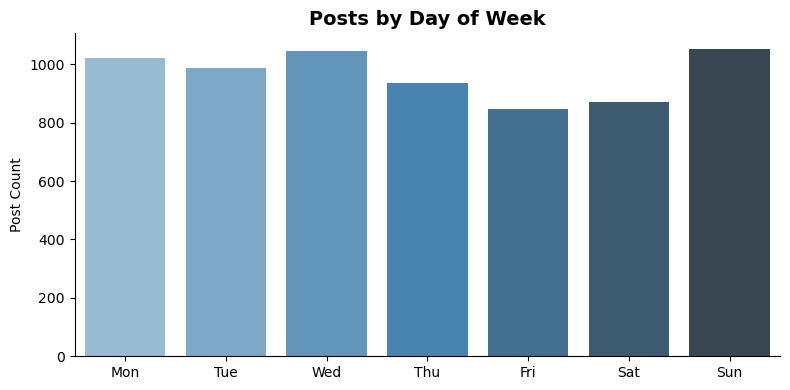

In [38]:
# posts per day-of-week
dow = df['date'].dt.dayofweek.value_counts().sort_index()
dow = dow.rename_axis('day').reset_index(name='posts')
dow['day'] = dow['day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

plt.figure(figsize=(8,4))
sns.barplot(data=dow, x='day', y='posts', hue='day', palette="Blues_d", legend=False)
plt.title("Posts by Day of Week", fontsize=14, weight='bold')
plt.xlabel(""); plt.ylabel("Post Count")
sns.despine(); plt.tight_layout(); plt.show()

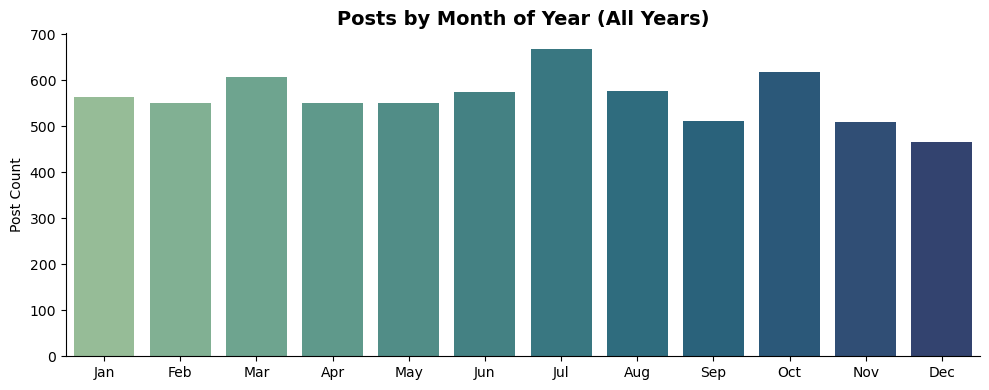

In [39]:
# posts per month-of-year
moy = df['date'].dt.month.value_counts().sort_index()
moy = moy.rename_axis('month').reset_index(name='posts')
moy['month'] = moy['month'].map({
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
    7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
})

plt.figure(figsize=(10,4))
sns.barplot(data=moy, x='month', y='posts', hue='month', palette="crest", legend=False)
plt.title("Posts by Month of Year (All Years)", fontsize=14, weight='bold')
plt.xlabel(""); plt.ylabel("Post Count")
sns.despine(); plt.tight_layout(); plt.show()

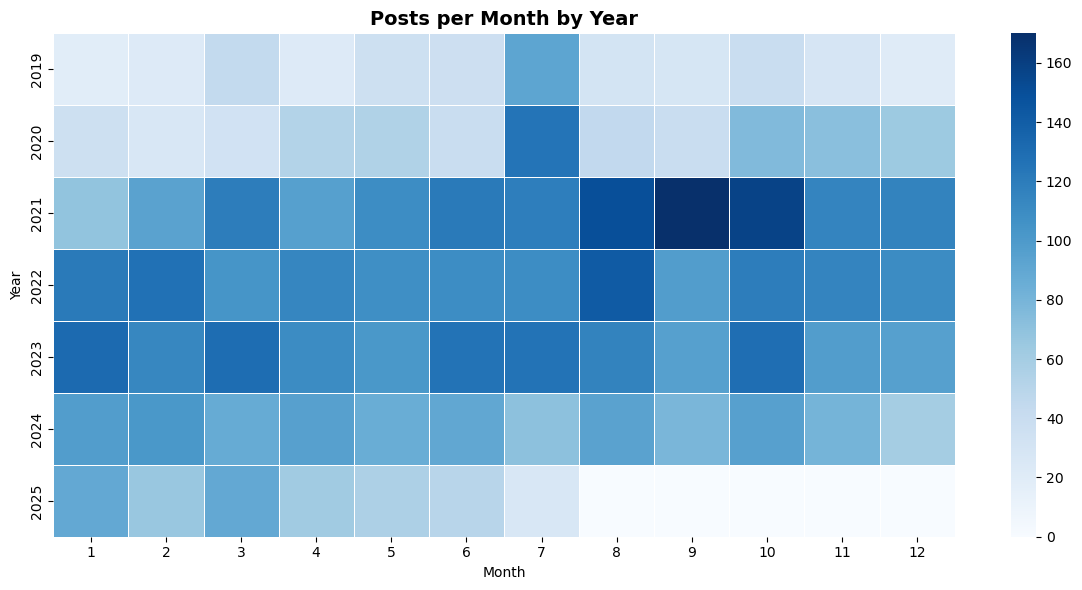

In [ ]:
# calendar-style heatmap: posts per month per year
ym = (df['date'].dt.to_period('M')
                .value_counts()
                .sort_index())
heat = ym.rename_axis('ym').to_frame('posts')
heat['year'] = heat.index.astype(str).str.slice(0,4).astype(int)
heat['month'] = heat.index.astype(str).str.slice(5,7).astype(int)

pivot = heat.pivot_table(index='year', columns='month', values='posts', fill_value=0)
pivot = pivot.reindex(columns=range(1,13)) 

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='Blues', linewidths=.5)
plt.title("Posts per Month by Year", fontsize=14, weight='bold')
plt.xlabel("Month"); plt.ylabel("Year")
plt.tight_layout(); plt.show()

In [35]:
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined,post_length
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",735
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",417
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",1374
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",2914
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",971


# 2 Beyond Blue EDA (Flattened)

In [36]:
import pandas as pd
import json
import ast

rows = []

for r in df.itertuples(index=False):
    op_author = r.author  # original poster for this thread
    
    # original post
    rows.append({
        "parent_post_id": r.post_id,
        "user_id":        op_author,
        "role":           "original",
        "text":           r.post_text,
        "date":           r.date,
        "category":       r.category,
    })
    
    # comments (inherit parent category)
    raw = getattr(r, "comments_combined", None)
    if pd.notna(raw) and str(raw).strip() not in ("", "[]"):
        parsed = None
        try:
            parsed = json.loads(raw)
        except Exception:
            try:
                parsed = ast.literal_eval(raw)
            except Exception:
                parsed = None
        if isinstance(parsed, (list, tuple)):
            for c in parsed:
                if not isinstance(c, dict):
                    continue
                author_c = c.get("author")
                role_c = "op_reply" if author_c == op_author else "commenter"
                rows.append({
                    "parent_post_id": r.post_id,
                    "user_id":        author_c,
                    "role":           role_c,
                    "text":           c.get("comment"),
                    "date":           c.get("timestamp"),
                    "category":       r.category,
                })

df_flat = pd.DataFrame(
    rows,
    columns=["parent_post_id", "user_id", "role", "text", "date", "category"]
)

# cleanup
df_flat["date"] = pd.to_datetime(df_flat["date"], errors="coerce")
df_flat["text"] = df_flat["text"].astype(str).str.strip()
df_flat = df_flat.dropna(subset=["date"])
df_flat = df_flat[df_flat["text"] != ""]
df_flat = df_flat.sort_values(["parent_post_id", "date"]).reset_index(drop=True)

df_flat.head(10)

,parent_post_id,user_id,role,text,date,category
0,1,Toby,original,"Hello everyone, this is my first post, so I ho...",2025-07-16,Anxiety
1,1,Morph,commenter,"Hi Toby, welcome and congratulations on your f...",2025-07-17,Anxiety
2,1,AudaciousPoodle,commenter,"Hi Toby, Reading your post sounds just like wh...",2025-07-17,Anxiety
3,1,_Gigi_,commenter,"Hello Toby,I'm glad you've decided to reach ou...",2025-07-18,Anxiety
4,1,Toby,op_reply,My anxiety is affecting my whole life. When I ...,2025-07-18,Anxiety
5,2,Shell1,original,Hi my name is Michelle and I have had Anxiety ...,2025-05-23,Anxiety
6,2,Croix,commenter,Dear Michelle ~Welcome here to the Support For...,2025-05-26,Anxiety
7,2,Priya953,commenter,"Hey Michelle, thanks for sharing, that sounds ...",2025-07-18,Anxiety
8,3,Guest_87295139,original,sorry if this is alot i just rlly need to get ...,2025-07-14,Anxiety
9,3,TrueSeeker,commenter,Hello I'm so sorry that you feel like this. An...,2025-07-15,Anxiety


In [37]:
# df type
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42961 entries, 0 to 42960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   parent_post_id  42961 non-null  int64         
 1   user_id         42961 non-null  object        
 2   role            42961 non-null  object        
 3   text            42961 non-null  object        
 4   date            42961 non-null  datetime64[ns]
 5   category        42961 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.0+ MB


In [38]:
print(df_flat.shape)

(42961, 6)


In [39]:
# save the flattened DataFrame
df_flat.to_csv("data/beyondblue_data_flattened.csv", index=False)

role
commenter    25968
op_reply     10240
original      6753
Name: count, dtype: int64


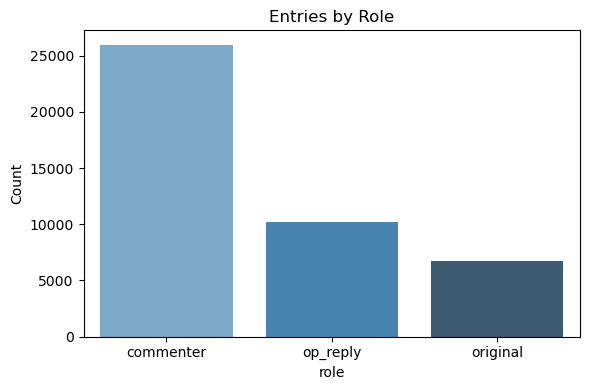

role,commenter,op_reply,original
category,,,
Depression,7145,2733,1968
Anxiety,7129,2541,1951
Suicidal thoughts and self-harm,6283,2564,1445
PTSD and trauma,5411,2402,1389


In [40]:
# role distribution and per-category role mix
role_counts = df_flat['role'].value_counts()
print(role_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=role_counts.index, y=role_counts.values, hue=role_counts.index, palette="Blues_d", legend=False)
plt.title("Entries by Role")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

role_by_cat = df_flat.pivot_table(index='category', columns='role', values='text', aggfunc='count', fill_value=0)
role_by_cat = role_by_cat.sort_values(by=role_by_cat.columns.tolist(), ascending=False)
role_by_cat.head(10)

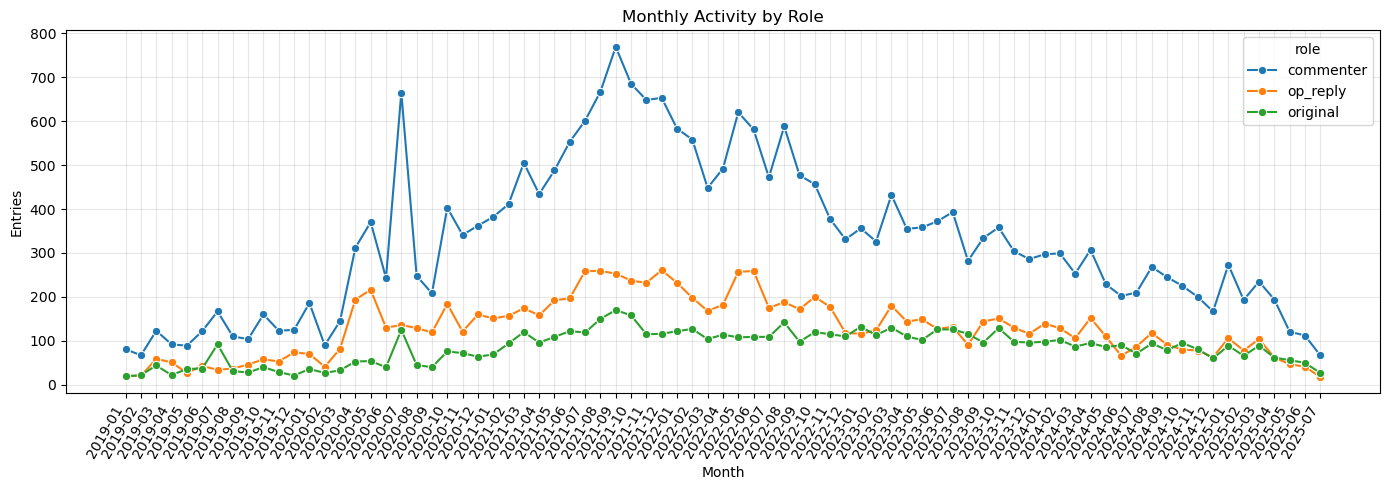

In [41]:
# activity over time: monthly entries per role
monthly = (
    df_flat
    .assign(month=lambda x: x['date'].dt.to_period('M').astype(str))
    .groupby(['month','role'])
    .size()
    .reset_index(name='count')
    .sort_values('month')
)

plt.figure(figsize=(14,5))
sns.lineplot(data=monthly, x='month', y='count', hue='role', marker='o')
plt.title("Monthly Activity by Role")
plt.xlabel("Month")
plt.ylabel("Entries")
plt.xticks(rotation=60, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
# thread-level metrics: messages per thread, unique participants, thread duration
thread_stats = (
    df_flat
    .groupby('parent_post_id')
    .agg(
        n_messages=('text','count'),
        n_participants=('user_id','nunique'),
        start=('date','min'),
        end=('date','max'),
        category=('category','first')
    )
    .assign(duration_days=lambda d: (d['end'] - d['start']).dt.total_seconds() / (24*3600))
    .sort_values('n_messages', ascending=False)
)

thread_stats.head(10)

,n_messages,n_participants,start,end,category,duration_days
parent_post_id,,,,,,
3407,41,8,2021-12-20,2022-01-03,Depression,14.0
5859,41,7,2020-08-11,2020-08-30,Suicidal thoughts and self-harm,19.0
1364,41,6,2020-03-04,2020-03-07,Anxiety,3.0
5974,41,8,2022-02-15,2022-03-05,Suicidal thoughts and self-harm,18.0
3177,41,12,2022-05-25,2022-08-02,Depression,69.0
96,41,28,2019-10-22,2019-12-18,Anxiety,57.0
4347,41,3,2022-03-26,2022-07-01,PTSD and trauma,97.0
6429,41,8,2020-05-24,2020-06-06,Suicidal thoughts and self-harm,13.0
2596,41,12,2020-08-11,2020-09-05,Depression,25.0


In [43]:
# first-response latency: time from original post to first comment
# original post time per thread
op_time = (
    df_flat[df_flat['role'] == 'original']
    .groupby('parent_post_id')['date']
    .min()
    .rename('op_time')
)

# first comment time per thread
first_comment_time = (
    df_flat[df_flat['role'] != 'original']
    .groupby('parent_post_id')['date']
    .min()
    .rename('first_comment_time')
)

latency = (
    pd.concat([op_time, first_comment_time], axis=1)
    .dropna()
    .assign(first_response_hours=lambda d: (d['first_comment_time'] - d['op_time']).dt.total_seconds()/3600)
    .sort_values('first_response_hours')
)

latency['first_response_hours'].describe()

count     6724.000000
mean        16.643664
std        199.681090
min       -888.000000
25%          0.000000
50%          0.000000
75%         24.000000
max      14256.000000
Name: first_response_hours, dtype: float64

In [44]:
# user-level metrics: total messages, threads participated, role mix
user_threads = df_flat.groupby(['user_id','parent_post_id']).size().reset_index(name='msgs_in_thread')

user_summary = (
    user_threads.groupby('user_id')
    .agg(
        total_messages=('msgs_in_thread','sum'),
        threads_participated=('parent_post_id','nunique')
    )
    .join(df_flat.pivot_table(index='user_id', columns='role', values='text', aggfunc='count', fill_value=0))
    .sort_values('total_messages', ascending=False)
)

user_summary.head(10)

,total_messages,threads_participated,commenter,op_reply,original
user_id,,,,,
Sophie_M,2676,2219,2671,0,5
therising,2094,1386,2094,0,0
Croix,1419,777,1419,0,0
geoff,1255,983,1255,0,0
white knight,1231,868,1113,82,36
Petal22,1052,651,1018,28,6
Eagle Ray,895,303,709,166,20
smallwolf,813,560,797,13,3
Ggrand,591,460,591,0,0


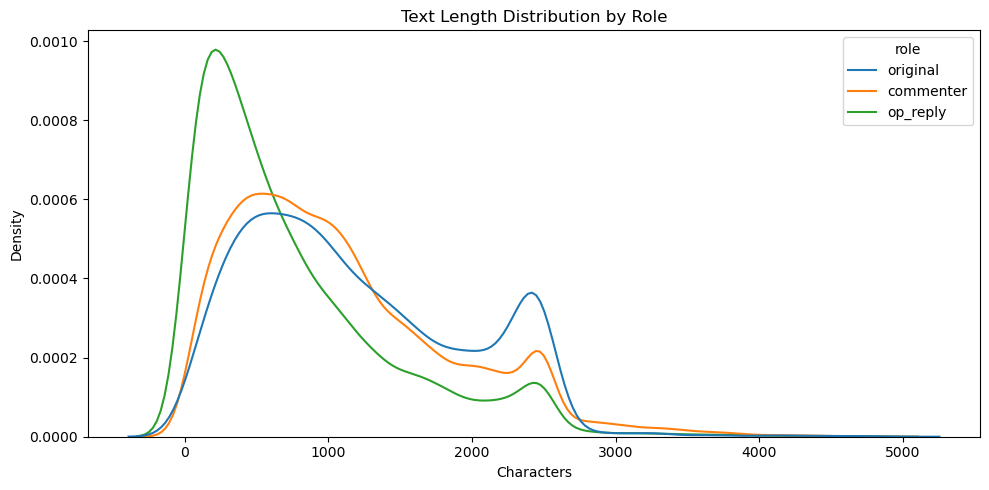

,count,mean,std,min,25%,50%,75%,max
role,,,,,,,,
commenter,25968.0,1093.243492,759.315962,2.0,510.00,932.0,1514.00,4808.0
op_reply,10240.0,757.143750,699.062330,1.0,240.75,532.0,1056.25,4769.0
original,6753.0,1190.214127,760.854303,2.0,571.00,1025.0,1750.00,4863.0


In [45]:
# text length distribution by role
df_flat['text_len'] = df_flat['text'].str.len()

plt.figure(figsize=(10,5))
sns.kdeplot(data=df_flat, x='text_len', hue='role', common_norm=False)
plt.title("Text Length Distribution by Role")
plt.xlabel("Characters")
plt.tight_layout()
plt.show()

df_flat.groupby('role')['text_len'].describe()

In [46]:
# simple interaction network: commenter -> thread OP (edge weights = number of comments)
# 1) get the original poster per thread
op_map = (
    df_flat[df_flat['role'] == 'original']
    .groupby('parent_post_id')['user_id']
    .first()
    .rename('op_user')
)

# 2) build edges from commenters to OP
comments_only = df_flat[df_flat['role'] != 'original'].copy()
comments_only = comments_only.join(op_map, on='parent_post_id')

edges = (
    comments_only
    .groupby(['user_id','op_user'])
    .size()
    .reset_index(name='weight')
    .rename(columns={'user_id':'source', 'op_user':'target'})
    .query('source.notna() and target.notna() and source != target')
    .sort_values('weight', ascending=False)
)

edges.head(15)

,source,target,weight
9865,Sophie_M,Lost__,69
4542,Guest_1643,Lost__,69
14284,jess334,Lost__,69
18098,white knight,Cookie64,69
17117,therising,Lost__,69
8874,Soberlicious96,Lost__,69
14727,mmMekitty,Scrabbling,41
2980,Eagle Ray,ABC01,37
3138,Eagle Ray,Rowen13,35
17716,therising,white knight,33


In [47]:
# top threads by engagement (messages & participants)
top_threads = thread_stats.sort_values(['n_messages','n_participants'], ascending=False).head(15)
top_threads[['n_messages','n_participants','duration_days','category']].head(15)

,n_messages,n_participants,duration_days,category
parent_post_id,,,,
96,41,28,57.0,Anxiety
5463,41,19,580.0,Suicidal thoughts and self-harm
456,41,19,1780.0,Anxiety
4433,41,18,5.0,PTSD and trauma
3481,41,18,38.0,Depression
1799,41,17,166.0,Anxiety
3485,41,14,54.0,Depression
1473,41,13,44.0,Anxiety
6509,41,13,42.0,Suicidal thoughts and self-harm


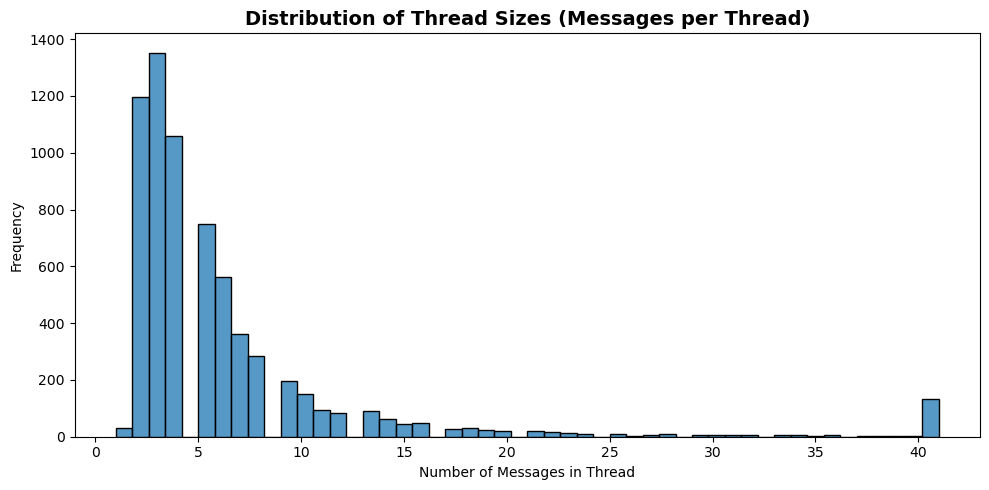

In [48]:
# Distribution of Thread Sizes (Messages per Thread)
plt.figure(figsize=(10,5))
sns.histplot(thread_stats['n_messages'], bins=50, kde=False)
plt.title("Distribution of Thread Sizes (Messages per Thread)", fontsize=14, weight='bold')
plt.xlabel("Number of Messages in Thread")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

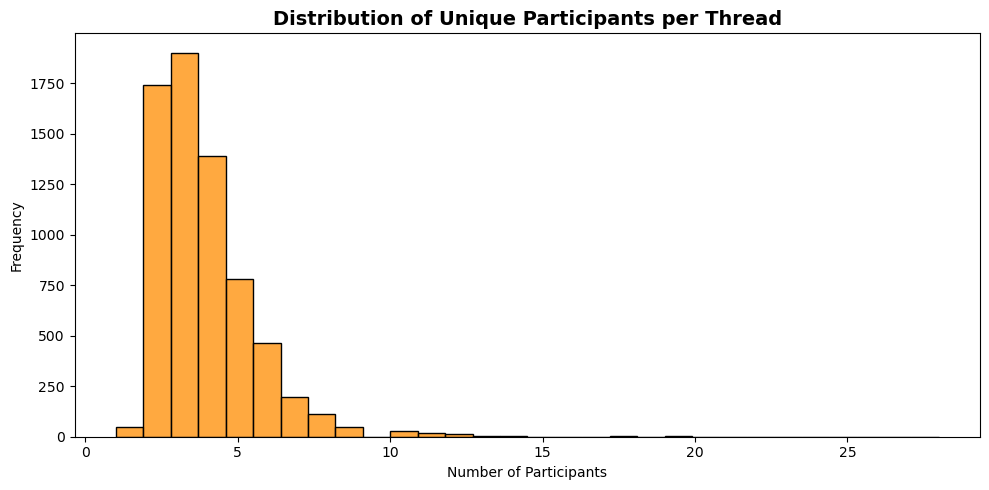

In [49]:
# Distribution of Unique Participants per Thread
plt.figure(figsize=(10,5))
sns.histplot(thread_stats['n_participants'], bins=30, kde=False, color="darkorange")
plt.title("Distribution of Unique Participants per Thread", fontsize=14, weight='bold')
plt.xlabel("Number of Participants")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

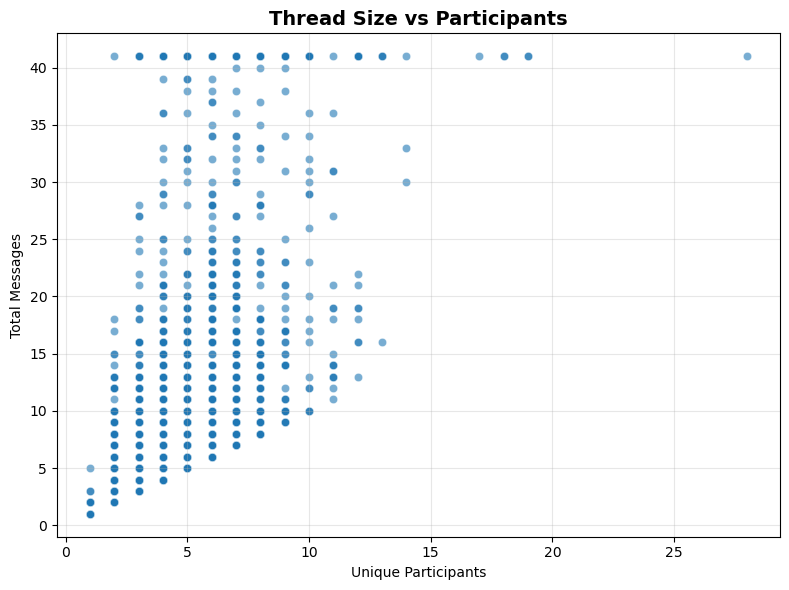

In [50]:
# Thread Size vs Participants (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(data=thread_stats, x='n_participants', y='n_messages', alpha=0.6)
plt.title("Thread Size vs Participants", fontsize=14, weight='bold')
plt.xlabel("Unique Participants")
plt.ylabel("Total Messages")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

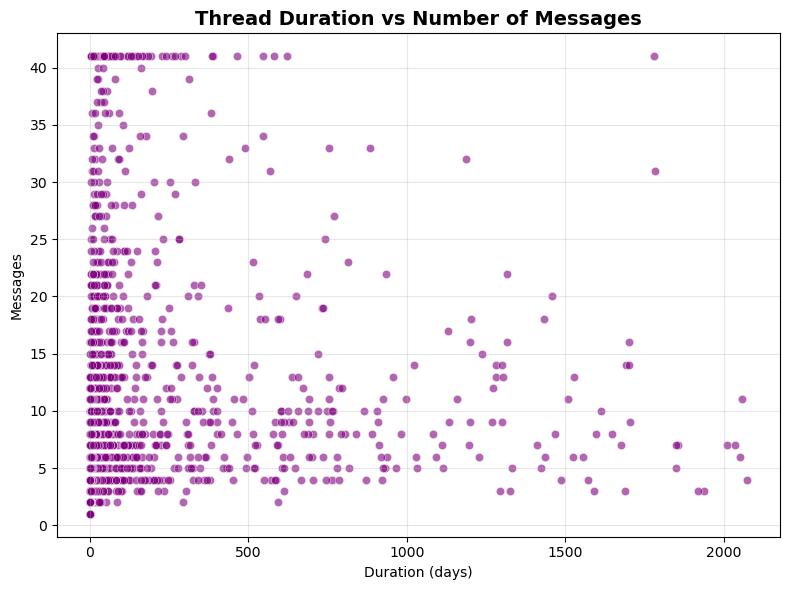

In [51]:
# Thread Duration vs Number of Messages (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(data=thread_stats, x='duration_days', y='n_messages', alpha=0.6, color="purple")
plt.title("Thread Duration vs Number of Messages", fontsize=14, weight='bold')
plt.xlabel("Duration (days)")
plt.ylabel("Messages")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/jm/36rrr53s1w388ms7208drrcm0000gn/T/ipykernel_17644/836597712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_commenters.values, y=top20_commenters.index, palette="Blues_r")


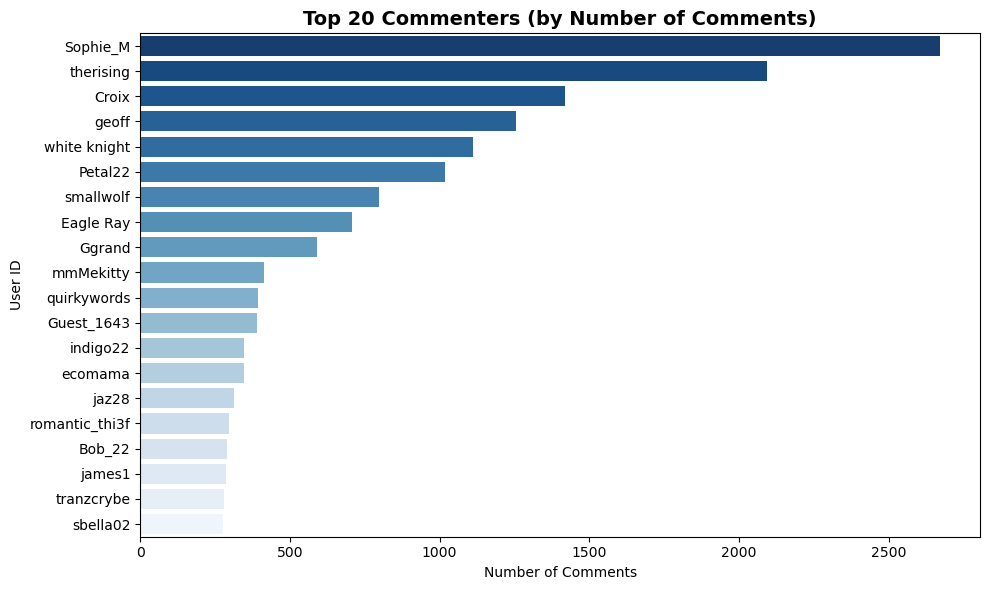

In [52]:
# Top 20 Commenters (by Number of Comments)
top20_commenters = df_flat[df_flat['role']=="commenter"]['user_id'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top20_commenters.values, y=top20_commenters.index, palette="Blues_r")
plt.title("Top 20 Commenters (by Number of Comments)", fontsize=14, weight='bold')
plt.xlabel("Number of Comments")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()

In [53]:
# helper: return dataframe of top words
from wordcloud import WordCloud, STOPWORDS

def get_top_words_df(text_series, n=20):
    import re
    from collections import Counter
    
    words = " ".join(text_series.dropna().astype(str).tolist()).lower()
    words = re.findall(r"\b[a-z]{3,}\b", words)  # keep only alphabetic words (>=3 chars)
    stopwords = set(WordCloud().stopwords)
    words = [w for w in words if w not in stopwords]
    top = Counter(words).most_common(n)
    return pd.DataFrame(top, columns=["word","count"])

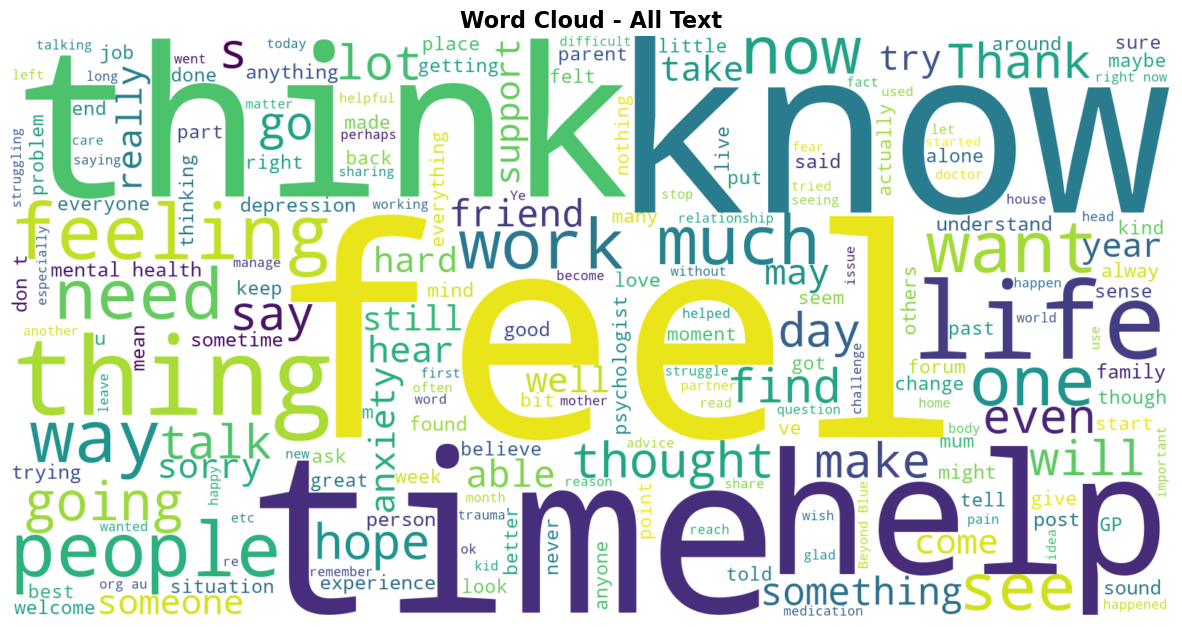

Top words (All Text):


,word,count
0,feel,41973
1,know,29324
2,time,25421
3,don,24461
4,people,24111
5,help,23867
6,really,22943
7,will,22234
8,life,22105
9,things,21702


In [54]:
# Word Cloud + Top Words - All Text
text_all = df_flat['text']
wc = WordCloud(width=1600, height=800, background_color="white", stopwords=set(STOPWORDS)).generate(" ".join(text_all))
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - All Text", fontsize=16, weight='bold')
plt.show()

print("Top words (All Text):")
display(get_top_words_df(text_all, n=20))

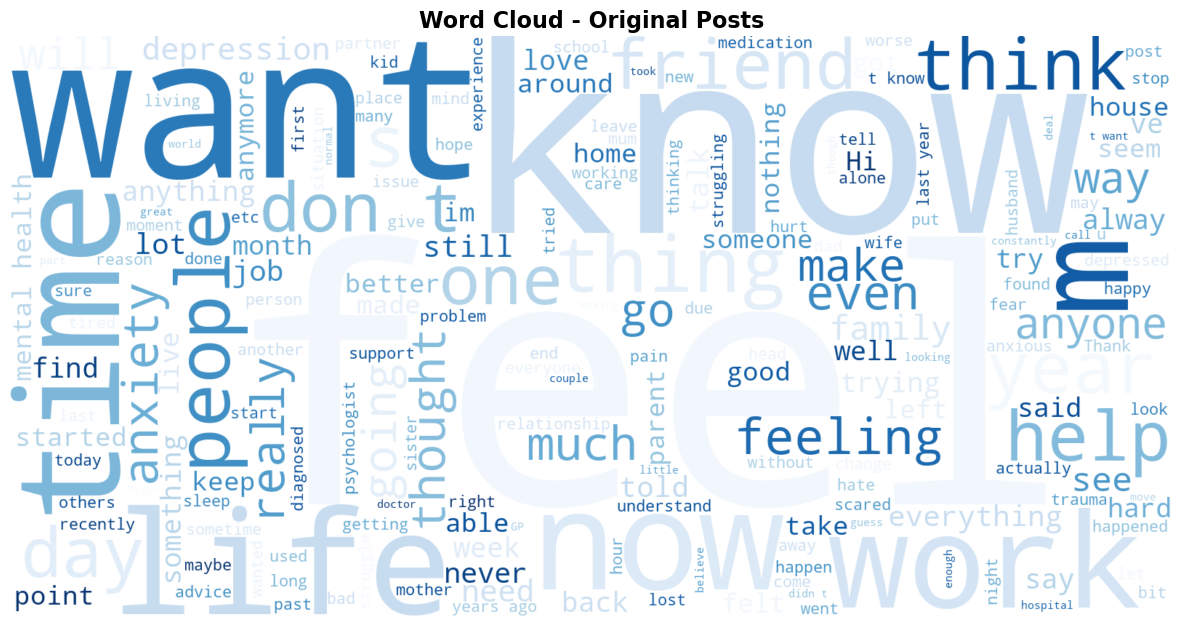

Top words (Original Posts):


,word,count
0,feel,9650
1,don,7570
2,know,6184
3,time,5224
4,want,5043
5,life,4971
6,now,4812
7,really,4593
8,years,4122
9,anxiety,3869


In [55]:
# Word Cloud + Top Words - Original Posts
text_op = df_flat[df_flat['role']=="original"]['text']
wc = WordCloud(width=1600, height=800, background_color="white", stopwords=set(STOPWORDS), colormap="Blues").generate(" ".join(text_op))
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Original Posts", fontsize=16, weight='bold')
plt.show()

print("Top words (Original Posts):")
display(get_top_words_df(text_op, n=20))

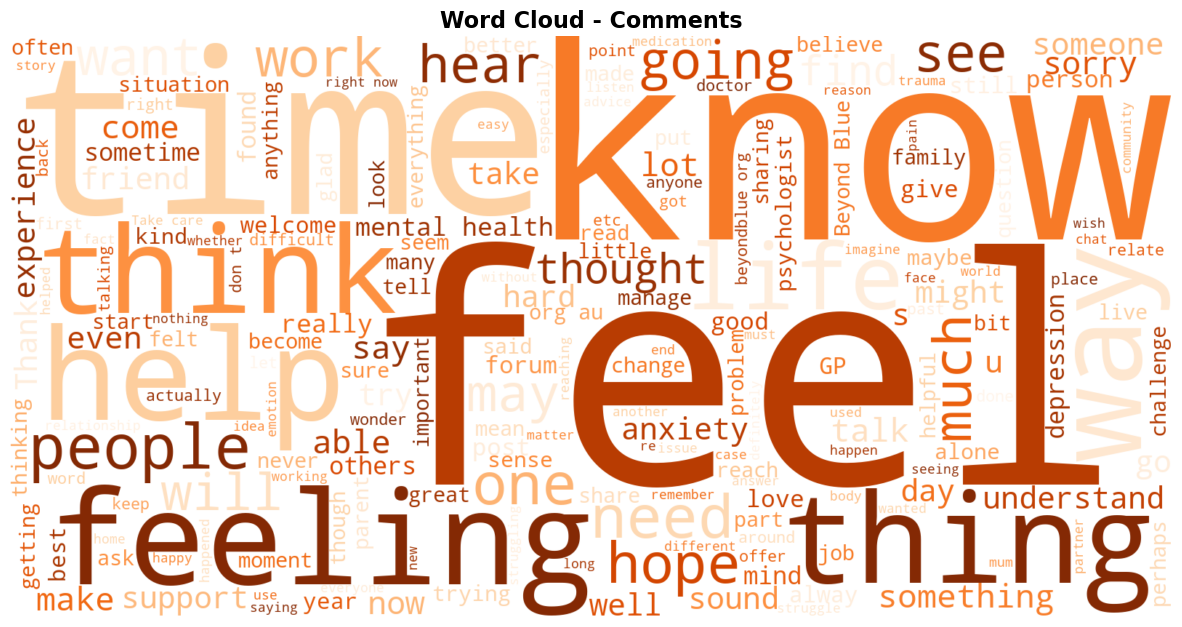

Top words (Comments):


,word,count
0,feel,25866
1,know,17552
2,help,17094
3,people,16211
4,time,15523
5,will,14733
6,things,14326
7,one,14276
8,support,14082
9,life,13930


In [56]:
# Word Cloud + Top Words - Comments
text_cm = df_flat[df_flat['role']=="commenter"]['text']
wc = WordCloud(width=1600, height=800, background_color="white", stopwords=set(STOPWORDS), colormap="Oranges").generate(" ".join(text_cm))
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Comments", fontsize=16, weight='bold')
plt.show()

print("Top words (Comments):")
display(get_top_words_df(text_cm, n=20))

In [57]:
import networkx as nx

G = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='weight')
degree = dict(G.degree())
top_helpers = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Most Connected Users (by degree):")
pd.DataFrame(top_helpers, columns=["user_id","connections"])

Top 10 Most Connected Users (by degree):


,user_id,connections
0,Sophie_M,1860
1,therising,1155
2,geoff,863
3,Croix,730
4,white knight,727
5,Petal22,588
6,smallwolf,533
7,Ggrand,421
8,quirkywords,295
9,Eagle Ray,267


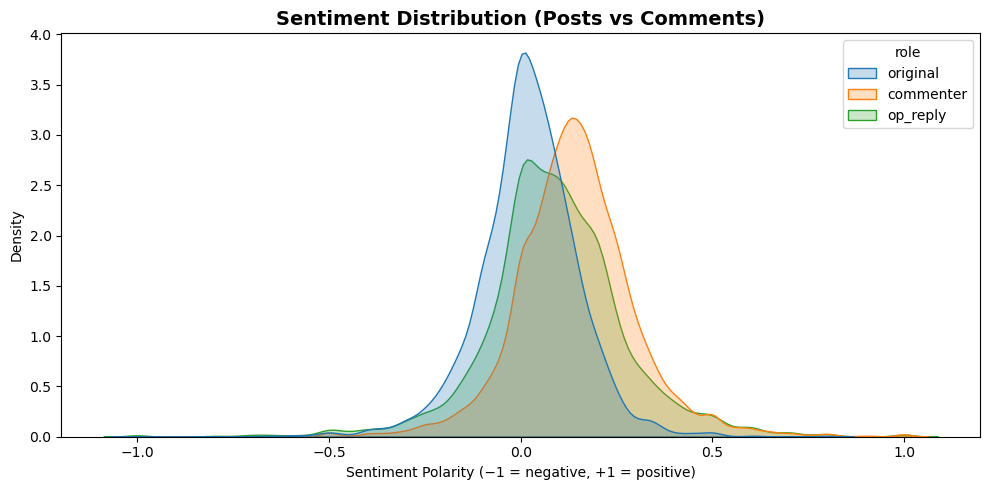

In [58]:
from textblob import TextBlob

df_flat['sentiment'] = df_flat['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10,5))
sns.kdeplot(data=df_flat, x='sentiment', hue='role', common_norm=False, fill=True)
plt.title("Sentiment Distribution (Posts vs Comments)", fontsize=14, weight='bold')
plt.xlabel("Sentiment Polarity (−1 = negative, +1 = positive)")
plt.tight_layout()
plt.show()